In [1]:
from numpy import arange
from math import log10 as log
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,7]

In [2]:
Ka1=10**(-2)
Ka2=10**(-2.6)
Ka3=10**(-6.16)
Ka4=10**(-10.26)

def D(H):
    return (H**4+Ka1*H**3+Ka1*Ka2*H**2+Ka1*Ka2*Ka3*H+Ka1*Ka2*Ka3*Ka4)

def alfa4(pH):
    H=10**(-pH)
    return (Ka1*Ka2*Ka3*Ka4)/D(H)
    
def alfa3(pH):
    H=10**(-pH)
    return (Ka1*Ka2*Ka3*H)/D(H)

def alfa2(pH):
    H=10**(-pH)
    return (Ka1*Ka2*H**2)/D(H)

def alfa1(pH):
    H=10**(-pH)
    return (Ka1*H**3)/D(H)

def alfa0(pH):
    H=10**(-pH)
    return (H**4)/D(H)

In [3]:
pH=[]
alpha0,alpha1,alpha2,alpha3,alpha4=[],[],[],[],[]
for i in arange(0,14,0.05): 
    pH.append(i)
    alpha4.append(alfa4(i))
    alpha3.append(alfa3(i))
    alpha2.append(alfa2(i))
    alpha1.append(alfa1(i))
    alpha0.append(alfa0(i))

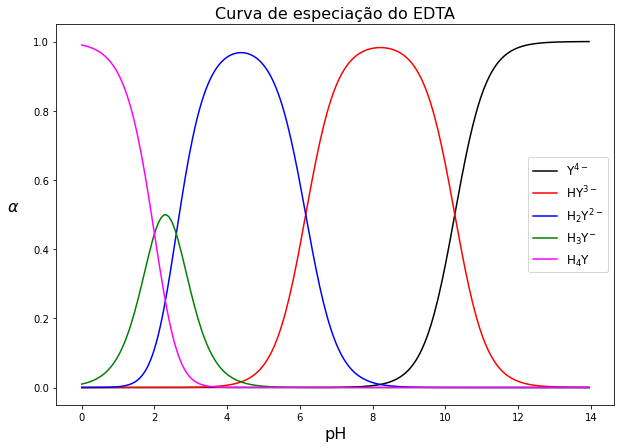

In [4]:
plt.plot(pH,alpha4,color='black')
plt.plot(pH,alpha3,color='red')
plt.plot(pH,alpha2,color='blue')
plt.plot(pH,alpha1,color='green')
plt.plot(pH,alpha0,color='magenta')
plt.xlabel('pH',size=16)
plt.ylabel('$\\alpha$',size=16,rotation='horizontal',labelpad=20)
plt.title('Curva de especiação do EDTA',size=16)
plt.legend(['Y$^{4-}$','HY$^{3-}$','H$_2$Y$^{2-}$', 'H$_3$Y$^{-}$','H$_4$Y'],fontsize='large')
plt.savefig('Especiação',dpi=300,format='jpeg')

In [5]:
from scipy.optimize import ridder

round(ridder(lambda pH: alfa4(pH)-0.2,0,14),2) #pH no qual o alfa do Y4- é igual a 0,2

9.66

In [6]:
def maximo(x):
    return round(pH[x.index(max(x))],2)

In [7]:
maximo(alpha1)

2.3